In [1]:
import os
from local_vars import root_folder

In [2]:
import numpy as np
import tensorflow
from tensorflow import keras
from keras.models import load_model
from matplotlib import pyplot
from numpy.random import randint


Using TensorFlow backend.


In [3]:
num_volume_slices = 3

In [4]:
image_file = r"NeedleCapture\2020-03-16-NeedleCapture-Medium\3Slice\NeedleCapture_Tofu_02_NoBlank_array_3d.npz"
model_file = r"NeedleCapture\2020-03-13-NeedleCapture\3Slice\Model\g_model_01_02_03_05_06_epoch100.h5"

output_folder = r"NeedleCapture\2020-03-16-NeedleCapture-Medium\3Slice\Results"

In [5]:
image_fullpath = os.path.join(root_folder, image_file)
model_fullpath = os.path.join(root_folder, model_file)

output_fullpath = os.path.join(root_folder, output_folder)

In [6]:
# load and prepare training images
def load_real_samples(filename):
    # load compressed arrays
    data = np.load(filename)
    # unpack arrays
    X1, X2 = data['arr_0'], data['arr_1']
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

In [7]:
# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img, n_iter):
    pyplot.rcParams["figure.figsize"]=10,10
    images = np.vstack((src_img, gen_img, tar_img))
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ['Generated', 'Expected']
    # plot images row by row
    for i in range(num_volume_slices+2):
        # define subplot
        pyplot.subplot(1 + n_iter, 7, 1 + i)
        # turn off axis
        pyplot.axis('off')
        
        # plot raw pixel data
        if i < num_volume_slices:
            pyplot.imshow(images[0,:,:,i])
            pyplot.title('Source')
        else:
            pyplot.imshow(images[i-(num_volume_slices-1),:,:,0])
            pyplot.title(titles[i-(num_volume_slices)])
        
    pyplot.show()

In [8]:
def save_images(src_img, gen_img, tar_img, ix):
    np.save(os.path.join(output_fullpath, "NeedleCapture_Tofu_02_{:03d}_source.npy".format(ix[0])), src_img[0,:,:,:])
    np.save(os.path.join(output_fullpath, "NeedleCapture_Tofu_02_{:03d}_generated.npy".format(ix[0])), gen_img[0,:,:,0])
    np.save(os.path.join(output_fullpath, "NeedleCapture_Tofu_02_{:03d}_target.npy".format(ix[0])), tar_img[0,:,:,0])

In [9]:
# load image data
[segments, ultrasounds] = load_real_samples(image_fullpath)
print('Loaded', segments.shape, ultrasounds.shape)

Loaded (274, 512, 512, 3) (274, 512, 512, 3)


In [10]:
model = load_model(model_fullpath)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\14sgp\Documents\Workspace\tf-gpu\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


[0]


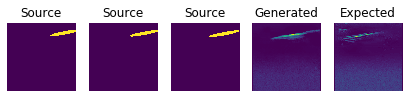

[25]


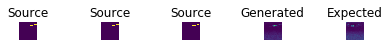

[50]


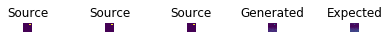

[75]


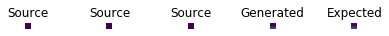

[100]


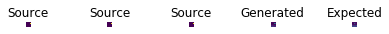

[125]


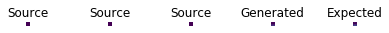

[150]


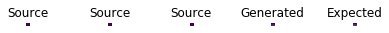

[175]


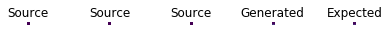

[200]


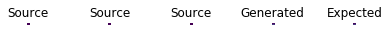

[225]


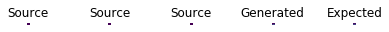

[250]


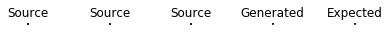

In [11]:
for i_example in range(len(segments)): 
    ix = [i_example]
    src_image, tar_image = segments[ix], ultrasounds[ix]
    
    # generate image from source
    gen_image = model.predict(src_image)
    # save all 3 images individually
    save_images(src_image, gen_image, tar_image, ix)
    if i_example % 25 == 0:
        print(ix)
        # plot all three images
        plot_images(src_image, gen_image, tar_image, i_example)